In [2]:
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

In [300]:
metadata = pd.read_csv("D:/CSVDatasets/Data/features_3_sec.csv")
metadata.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [301]:
metadata.shape

(9990, 60)

In [302]:
metadata.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

###  Dropping unwanted labes

In [303]:
metadata = metadata.drop(labels='filename',axis=1)

In [304]:
audio_ = "D:/CSVDatasets/Data/genres_original/blues/blues.00003.wav"
audi_data,sampleRate = librosa.load(audio_,sr=45600)
print(type(data),type(sampleRate))
print(audi_data," ",sampleRate)

<class 'numpy.ndarray'> <class 'int'>
[-0.01265346 -0.02290098 -0.0300912  ...  0.01336751  0.01131434
  0.00562026]   45600


C:\Users\bandi\AppData\Local\Temp\ipykernel_23108\1873224643.py:5: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft,sr=45600,x_axis='time',y_axis='hz')


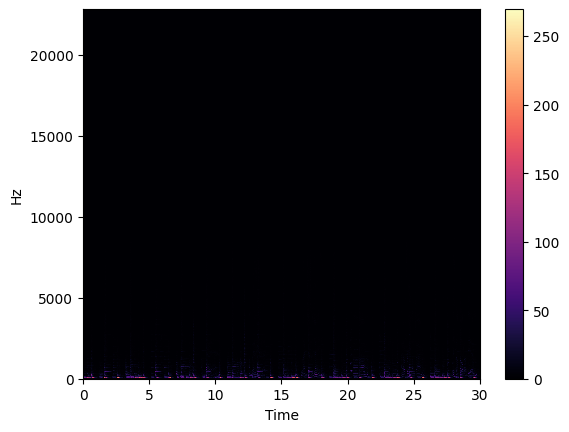

In [305]:
##SpectroGram Visualizaiton
stft = librosa.stft(audi_data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure()
librosa.display.specshow(stft,sr=45600,x_axis='time',y_axis='hz')
plt.colorbar()

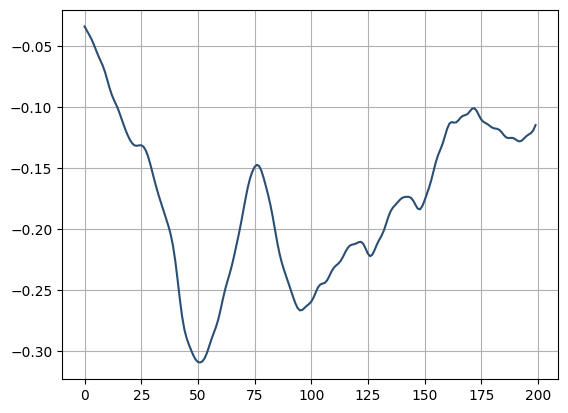

In [306]:
start = 1000
end = 1200
plt.figure()
plt.plot(audi_data[start:end],color='#2B4F72')
plt.grid()

### Feature Extraction

In [307]:
class_list = metadata.iloc[:,-1]
convertor = LabelEncoder()


### fit_transform():This Methods Encodes the labeled numbers into number
### example: 0 for blues,1 for classical,2 for rock etc

In [308]:
y = convertor.fit_transform(class_list)
np.save("D:/PICTURES/OneDrive/Desktop/Project/MusicGenreClassification/classes.npy",convertor.classes_)


In [309]:
print(metadata.iloc[:,:-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

### Scaling Features

In [310]:
from sklearn.preprocessing import StandardScaler
fit = StandardScaler()
x = fit.fit_transform(np.array(metadata.iloc[:,:-1],dtype = float))
x

array([[ 0.        , -0.48780784,  0.64052047, ..., -0.51356204,
         0.12841417, -0.29178072],
       [ 0.        , -0.40314187,  0.13183473, ...,  1.01138445,
         1.27578001,  0.05642464],
       [ 0.        , -0.36169428,  0.7644909 , ..., -0.04624405,
         0.65390663, -0.52145798],
       ...,
       [ 0.        , -0.35433044,  0.42997426, ..., -0.15370124,
         0.11765485, -0.33882395],
       [ 0.        ,  0.0883611 , -0.00630133, ..., -0.72456977,
         0.30333409, -0.95893743],
       [ 0.        , -0.11321002,  0.19536324, ..., -0.37245283,
        -0.47495901, -0.55112155]])

### To save the Scaler

In [311]:
from joblib import dump
dump(fit,'D:/PICTURES/OneDrive/Desktop/Project/MusicGenreClassification/scaler.joblib')


['D:/PICTURES/OneDrive/Desktop/Project/MusicGenreClassification/scaler.joblib']

In [312]:
x.shape

(9990, 58)

### Divide data into Training and Testing Sets

In [313]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.33) 
print(len(X_train)," ",len(X_test)," ",len(Y_train))

6693   3297   6693


### BuildModel

In [314]:
from tensorflow.keras.models import Sequential

In [315]:
def trainModel(model,epochs,optimizer):
    batch_size=128
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=epochs,batch_size=batch_size)

In [316]:
def plotValidation(history):
    print("validation Accuracy",max(history.history["val_accuracy"]))
    pd.Dataframe(history.history).plot()
    plt.show()

In [317]:
model = Sequential()
model.add(Dense(1024,input_shape=(X_train.shape[1],),activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))

C:\Users\bandi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [319]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_75 (Dense)                     │ (None, 1024)                │          60,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_65 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_66 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_67 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_68 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_69 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_70 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 760,106 (2.90 MB)

 Trainable params: 760,106 (2.90 MB)

 Non-trainable params: 0 (0.00 B)

In [320]:
model_history = trainModel(model=model,epochs=600,optimizer='adam')

Epoch 1/600
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.2344 - loss: 2.0317 - val_accuracy: 0.5423 - val_loss: 1.3234
Epoch 2/600
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4801 - loss: 1.4435 - val_accuracy: 0.6667 - val_loss: 1.0358
Epoch 3/600
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6053 - loss: 1.1489 - val_accuracy: 0.7379 - val_loss: 0.8298
Epoch 4/600
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6925 - loss: 0.9338 - val_accuracy: 0.7510 - val_loss: 0.7643
Epoch 5/600
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7314 - loss: 0.8157 - val_accuracy: 0.7777 - val_loss: 0.6933
Epoch 6/600
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7827 - loss: 0.6891 - val_accuracy: 0.8101 - val_loss: 0.6264
Epoch 7/600
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8070 - loss: 0.6225 - val_accuracy: 0.8050 - val_loss: 0.6483
Epoch 8/600
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8222 - loss: 0.5785 - val_accuracy: 0.

### Model Evalutation

In [321]:
test_loss,test_acc = model.evaluate(X_test,Y_test,batch_size=128)
print(test_loss," ",test_acc)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9262 - loss: 0.9358
0.9354155659675598   0.9272065758705139


### plot the loss and accuracy

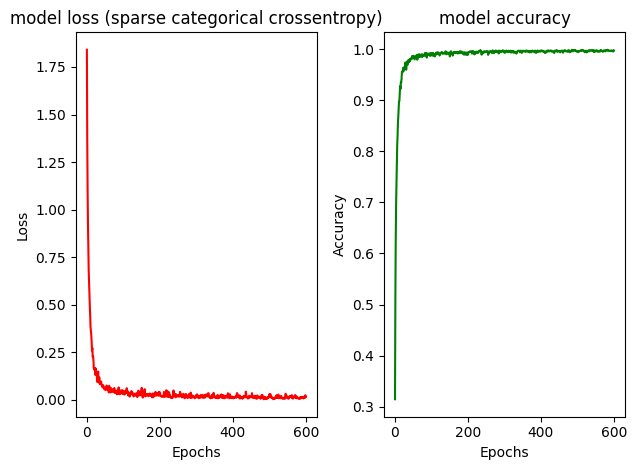

In [322]:
epochs = np.arange(1,601)
plt.subplot(1,2,1)
plt.plot(epochs,model_history.history['loss'],color='r')
plt.title('model loss (sparse categorical crossentropy)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(epochs,model_history.history['accuracy'],color='g')
plt.title('model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

### Confusion Matrix

In [323]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
preds = []
for i in pred:
    out=np.argmax(i)
    preds.append(out)
cm = confusion_matrix(Y_test,preds)
cm

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


array([[329,   0,   4,   1,   0,   4,   2,   0,   1,   2],
       [  0, 314,   1,   0,   0,  11,   0,   1,   0,   3],
       [  4,   0, 286,   2,   1,  11,   0,   1,   5,   7],
       [  1,   4,   2, 310,   3,   1,   4,   2,   5,   4],
       [  0,   0,   5,   5, 300,   2,   1,   5,   3,   0],
       [  1,  10,   6,   0,   0, 309,   0,   3,   1,   1],
       [  0,   1,   1,   3,   2,   0, 329,   0,   0,   7],
       [  0,   0,   5,   5,   6,   2,   0, 311,   6,   2],
       [  3,   0,   0,   7,   3,   1,   0,   0, 291,   1],
       [  4,   1,  13,   8,   4,   5,   8,   2,  10, 278]], dtype=int64)

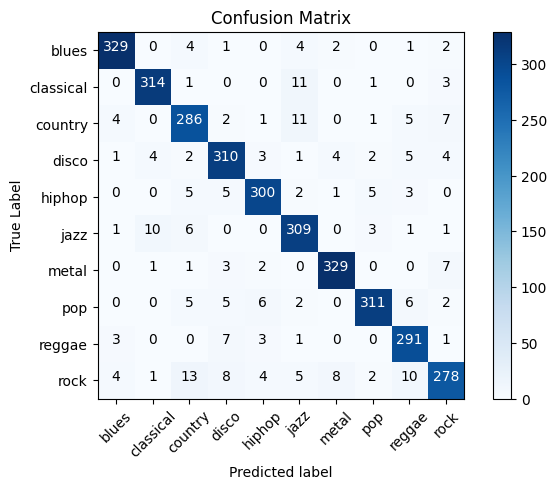

In [324]:
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = convertor.classes_
tickMarks = np.arange(len(classes))
plt.xticks(tickMarks,classes,rotation=45)
plt.yticks(tickMarks,classes)
fmt='d'
thresh = cm.max()/2.
for i,j in np.ndindex(cm.shape):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment = "center",
             color="white" if cm[i,j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.show()

In [334]:
def predict(model,X,Y):
    X= X[np.newaxis, ...]
    prediction = model.predict(X)
    print(prediction)
    predicted_index = np.argmax(prediction,axis=1)
    print("Expected index: ",Y)
    print("Predicted index: ",predicted_index)
#testing
x_=X_test[259]
y_=Y_test[259]
predict(model,x_,y_)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[1.4529922e-34 1.0000000e+00 4.7698136e-27 0.0000000e+00 0.0000000e+00
  1.3158637e-17 0.0000000e+00 1.1857422e-29 3.5586613e-34 0.0000000e+00]]
Expected index:  1
Predicted index:  [1]


In [337]:
model.save("D:/PICTURES/OneDrive/Desktop/Project/MusicGenreClassification/MusicModel.h5")

In [4]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
import numpy as np
from joblib import load
import librosa
#load trained model
model = keras.models.load_model("D:/PICTURES/OneDrive/Desktop/Project/MusicGenreClassification/MusicModel.h5")
le = LabelEncoder()
le.classes_ = np.load("D:/PICTURES/OneDrive/Desktop/Project/MusicGenreClassification/classes.npy",allow_pickle=True)
fit = load("D:/PICTURES/OneDrive/Desktop/Project/MusicGenreClassification/scaler.joblib") 

def extract_audio_features(audio_file_path):
    # Load audio file
    y, sr = librosa.load(audio_file_path)

    # Length of the audio
    length = 66149

    # Extract Chroma features
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_stft_mean = np.mean(chroma_stft)
    chroma_stft_var = np.var(chroma_stft)

    # Extract Root Mean Square (RMS) energy
    rms = librosa.feature.rms(y=y)
    rms_mean = np.mean(rms)
    rms_var = np.var(rms)

    # Extract Spectral Centroid
    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_centroid_mean = np.mean(spectral_centroids)
    spectral_centroid_var = np.var(spectral_centroids)

    # Extract Spectral Bandwidth
    spectral_bandwidths = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spectral_bandwidth_mean = np.mean(spectral_bandwidths)
    spectral_bandwidth_var = np.var(spectral_bandwidths)

    # Extract Spectral Roll-off
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    rolloff_mean = np.mean(spectral_rolloff)
    rolloff_var = np.var(spectral_rolloff)

    # Extract Zero Crossing Rate
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    zero_crossing_rate_mean = np.mean(zero_crossing_rate)
    zero_crossing_rate_var = np.var(zero_crossing_rate)

    # Extract Harmonic/Percussive components
    harm, perc = librosa.effects.hpss(y)
    harmony_mean = np.mean(harm)
    harmony_var = np.var(harm)
    perceptr_mean = np.mean(perc)
    perceptr_var = np.var(perc)

    # Extract Tempo
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

    # Extract Mel-Frequency Cepstral Coefficients (MFCCs)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    mfccs_mean = np.mean(mfccs, axis=1)
    mfccs_var = np.var(mfccs, axis=1)
    print(length)
    features = np.array([length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,
                         spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,
                         perceptr_mean,perceptr_var,tempo,mfccs_mean[0],mfccs_var[0],mfccs_mean[1],mfccs_var[1],mfccs_mean[2],mfccs_var[2],mfccs_mean[3],
                         mfccs_var[3],mfccs_mean[4],mfccs_var[4],mfccs_mean[5],mfccs_var[5],mfccs_mean[6],mfccs_var[6],mfccs_mean[7],mfccs_var[7],mfccs_mean[8],
                         mfccs_var[8], mfccs_mean[9],mfccs_var[9],mfccs_mean[10],mfccs_var[10],mfccs_mean[11],mfccs_var[11],mfccs_mean[12], mfccs_var[12],
                         mfccs_mean[13],mfccs_var[13],mfccs_mean[14],mfccs_var[14],mfccs_mean[15],mfccs_var[15],mfccs_mean[16],mfccs_var[16],mfccs_mean[17],
                         mfccs_var[17],mfccs_mean[18],mfccs_var[18],mfccs_mean[19],mfccs_var[19]])
    return features

def classify_audio():
    filename = filedialog.askopenfilename()
    if filename:
        X = extract_audio_features(filename)
        X = np.expand_dims(X,axis=0)
        X = fit.transform(X)
        y_pred = model.predict(X)
        predicted_index = le.classes_[np.argmax(y_pred,axis=1)]
        global predicted_genre
        predicted_genre = predicted_index[0]

        result_label = tk.Label(window,text='The genre for your music is',font=("helvetica",20))
        result_label.pack()
        result_label = tk.Label(window,text=predicted_genre,font=("Helvetica",20))
        result_label.pack(pady=20)

window = tk.Tk()
window.geometry("900x600")
window.title("Audio Genre Classification")

load_button = tk.Button(window,text='Load Audio File',command=classify_audio)
load_button.pack(pady=20)
window.mainloop()

66149
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


KeyboardInterrupt: 